# Image denoise with Fourier Transform

## Low pass

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float
from scipy.fft import ifft2,fft2,fftshift
from scipy import fftpack

In [2]:
img = cv2.imread('image.png')

In [3]:
f = np.fft.fft2(img,axes=(0,1))

In [4]:
fshift = np.fft.fftshift(f)

In [5]:
r = 90
mask = np.ones_like(img)
crow, ccol = mask.shape[0] // 2, mask.shape[1] // 2

In [6]:
for c in range(img.shape[2]):
    mask[crow - r : crow + r, ccol - r : ccol + r, c] = 0

In [7]:
fshift_masked = fshift * mask

In [8]:
f_ishift = np.fft.ifftshift(fshift_masked, axes=(0, 1))

In [9]:
new_img = np.fft.ifft2(f_ishift, axes=(0, 1))
new_img = np.abs(new_img).clip(0, 255).astype(np.uint8)

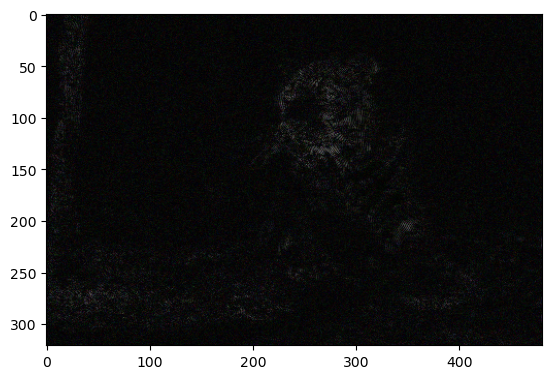

In [10]:
new_img=cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
plt.imshow(new_img)

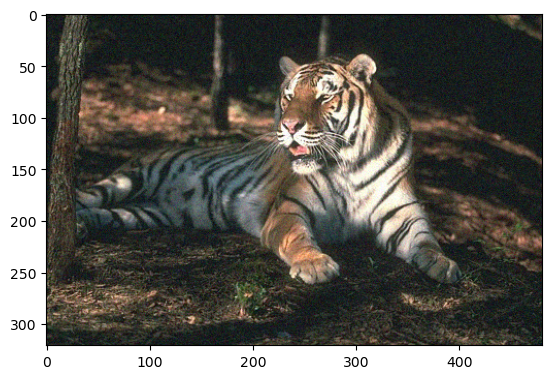

In [11]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)